# Customer Churn

In [3]:
import numpy as np
import pandas as pd

import os

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Overview

In [4]:
#load data
data = pd.read_csv(r"../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
#first few rows
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The number of enteries are 7043 with no NAN, and we have 21 attributes including ID.

In [6]:
#Unique values in each attribute
for item in data.columns:
    print(f"Unique {item}'s count: {data[item].nunique()}")
    print(f"{data[item].unique()}\n\n")

Unique customerID's count: 7043
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']


Unique gender's count: 2
['Female' 'Male']


Unique SeniorCitizen's count: 2
[0 1]


Unique Partner's count: 2
['Yes' 'No']


Unique Dependents's count: 2
['No' 'Yes']


Unique tenure's count: 73
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]


Unique PhoneService's count: 2
['No' 'Yes']


Unique MultipleLines's count: 3
['No phone service' 'No' 'Yes']


Unique InternetService's count: 3
['DSL' 'Fiber optic' 'No']


Unique OnlineSecurity's count: 3
['No' 'Yes' 'No internet service']


Unique OnlineBackup's count: 3
['Yes' 'No' 'No internet service']


Unique DeviceProtection's count: 3
['No' 'Yes' 'No internet service']


Unique TechSupport's count: 3
['No' 'Yes' 'No internet service']


Unique 

In [7]:
catCols = ["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "InternetService", 
           "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", 
           "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod", "Churn"]
data[catCols] = data[catCols].astype('category') # change columns to type category

data["tenure"] = data["tenure"].astype('int64') # change columns to type int64

# Converting totalcharges column to float gives an error, lets find out why
# data["TotalCharges"] = data["TotalCharges"].astype('float64') # change columns to type float64


In [8]:
tCharges = data.sort_values('TotalCharges')
tCharges.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
6754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No


We see that 11 values are empty strings (they didnt show as NA's earlier). And looking at the columns, it seems the missing values are arbitrary. So rather than imputing zeros, we will remove the entire rows as it's only 0.15% of the entire data.

In [9]:
#convert empty strings to NAN (actually there is one space)
data['TotalCharges'] = data["TotalCharges"].replace(" ",np.nan)

#remove nulls and reset index
data = data[data["TotalCharges"].notnull()]
data = data.reset_index()[data.columns]

#convert to float64
data["TotalCharges"] = data["TotalCharges"].astype(float)

We notice that some of the attributes have redundant values like MultipleLines with `No` and `No phone service`, we can combine those to make it easier for the classifier down the line.

In [10]:
colsForReplacement = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']

for colName in colsForReplacement:
    data[colName] = data[colName].replace({'No internet service' : 'No'})

And for SeniorCitizen column, we should convert it to `Yes` and `No` to maintain consistency.

In [11]:
data["SeniorCitizen"] = data["SeniorCitizen"].replace({1:"Yes",0:"No"})

Exploratory analysis

In [12]:
#split churned and didnt churn
churn = data[data['Churn']=='Yes']
no_churn = data[data['Churn']=='No']

#Separating catagorical and numerical columns
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
cat_cols   = [x for x in data.columns if x not in num_cols + ['customerID', 'Churn']]

In [59]:
#function to plot count barcharts for all categorical attributes
def drawBar(churn, no_churn, column):
    churned_vals = churn[column].value_counts().sort_values()
    not_churned_vals = no_churn[column].value_counts().sort_values()
    
    fig = plt.figure(figsize=(13,4.5))
    plt.subplots_adjust(hspace=0.25)

    #  subplot #1
    fig.add_subplot(121)
    plt.title(f'Churn - {column}', fontsize=17)
    if(column == 'PaymentMethod'): plt.xticks(rotation=20)
    for i, item in enumerate(churned_vals):
        plt.text(i, item+churned_vals.max()*.018, "{:0.2f}%".format(item/churned_vals.sum()*100), 
                 horizontalalignment='center', verticalalignment='center',color='black')
    sns.countplot(data=churn, x=column, order=churn[column].value_counts(ascending=True).index)
    
    
    #  subplot #2
    fig.add_subplot(122)
    plt.title(f'No Churn - {column}', fontsize=17)
    if(column == 'PaymentMethod'): plt.xticks(rotation=20)
    for i, item in enumerate(not_churned_vals):
        plt.text(i, item+not_churned_vals.max()*.018, "{:0.2f}%".format(item/not_churned_vals.sum()*100), 
                 horizontalalignment='center', verticalalignment='center',color='black')
    sns.countplot(data=no_churn, x=column, order=no_churn[column].value_counts(ascending=True).index)
    

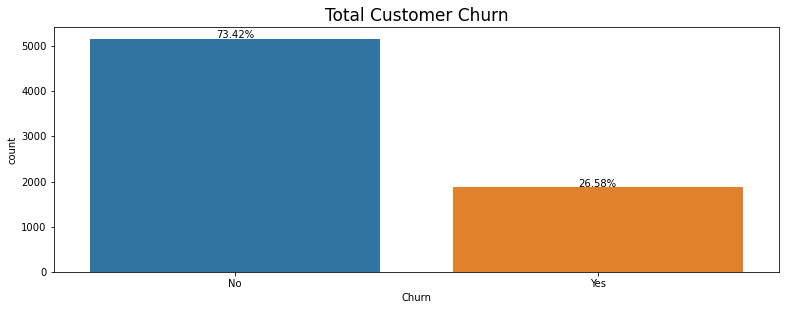

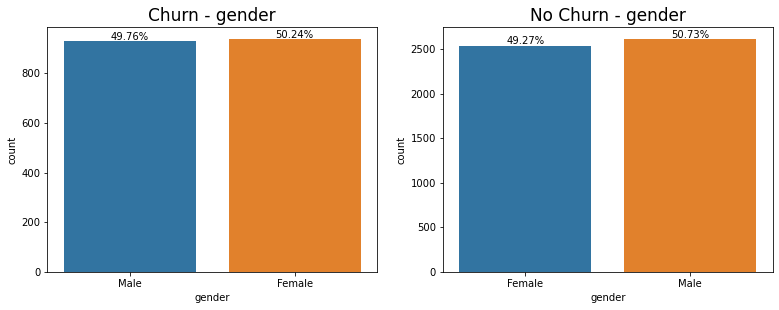

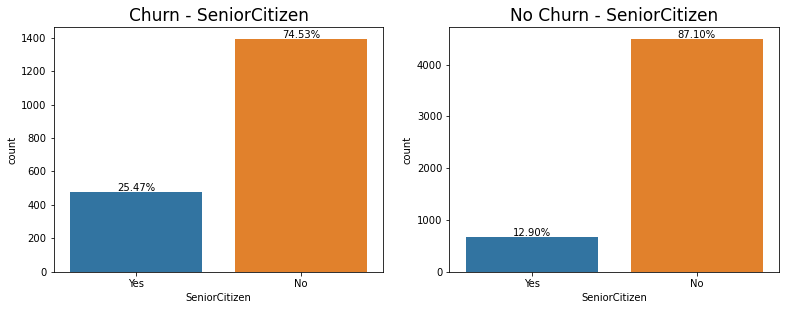

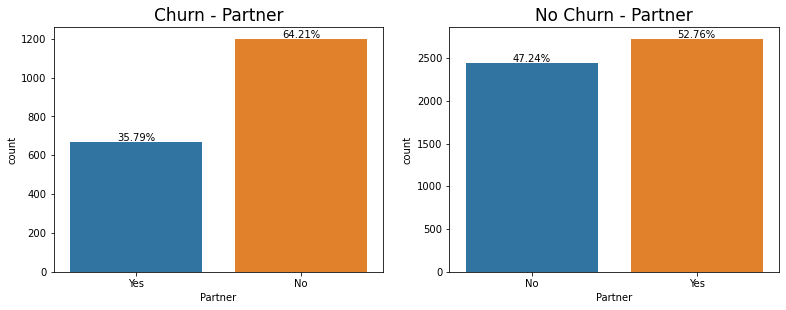

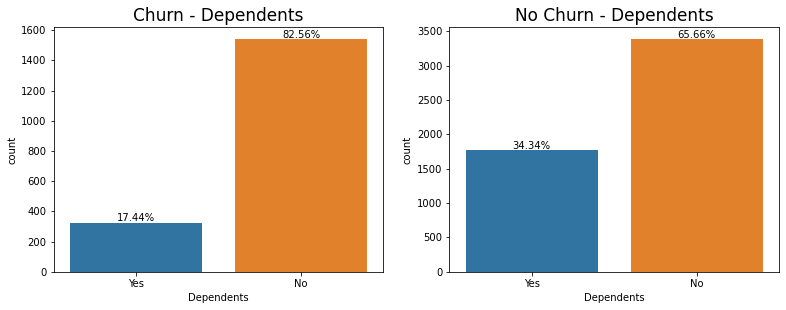

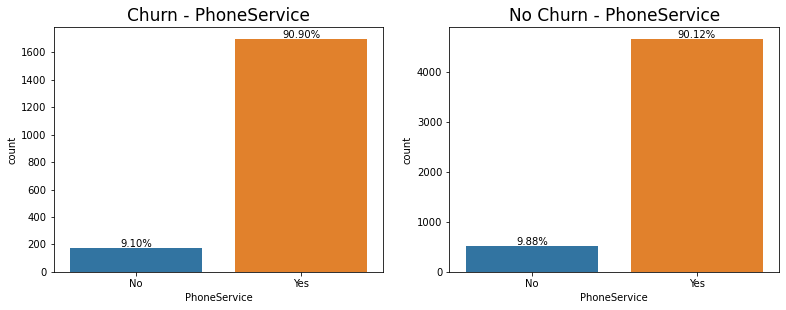

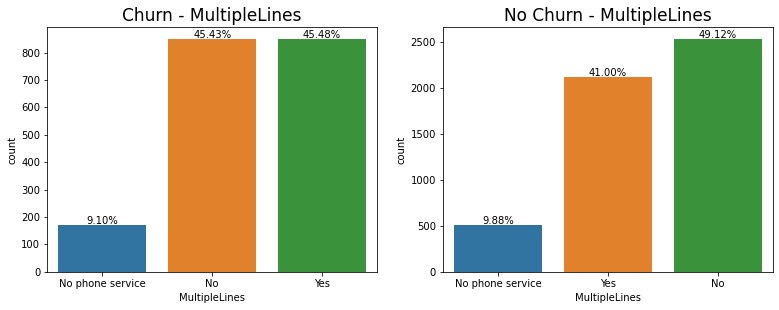

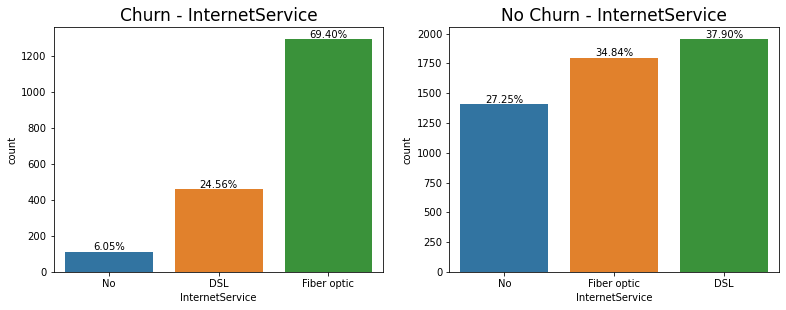

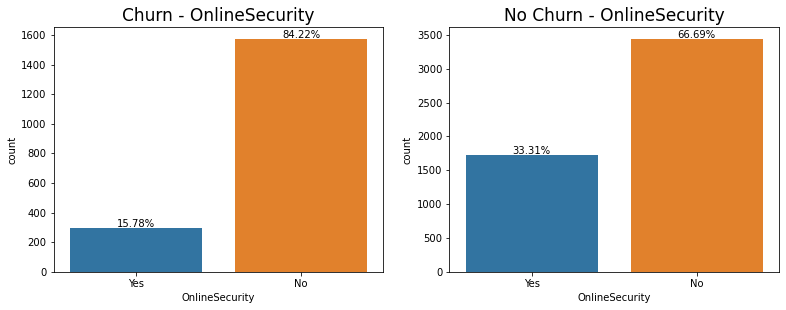

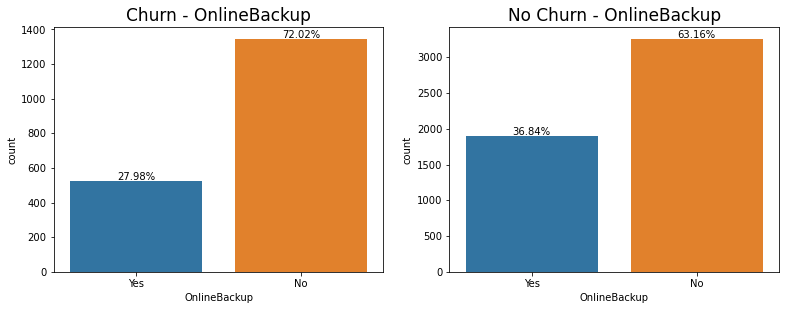

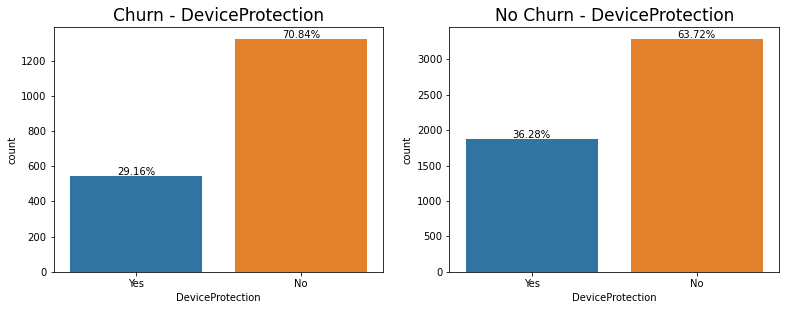

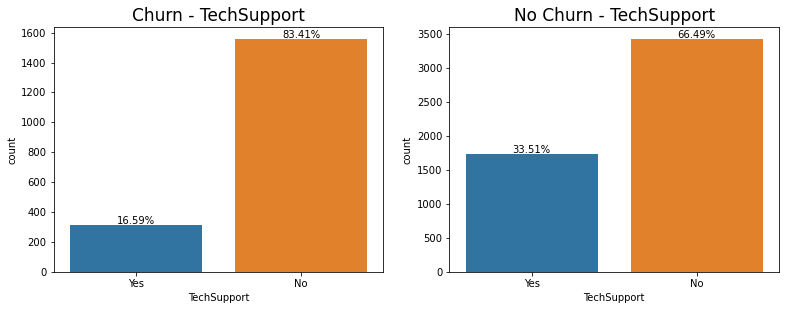

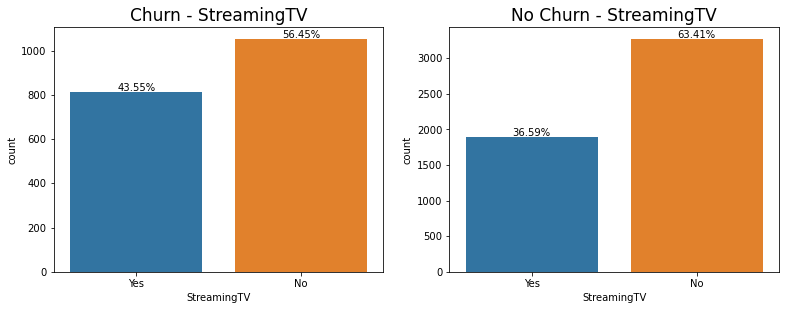

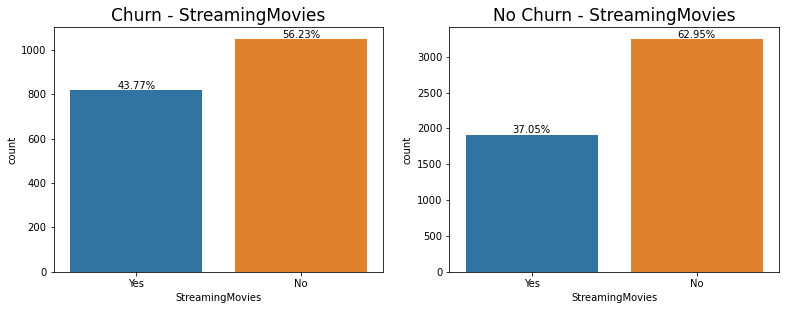

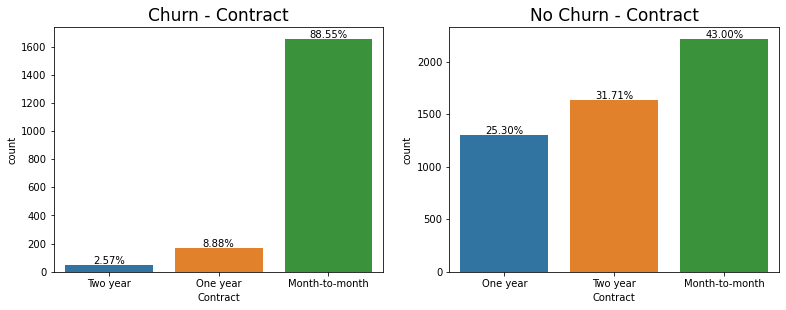

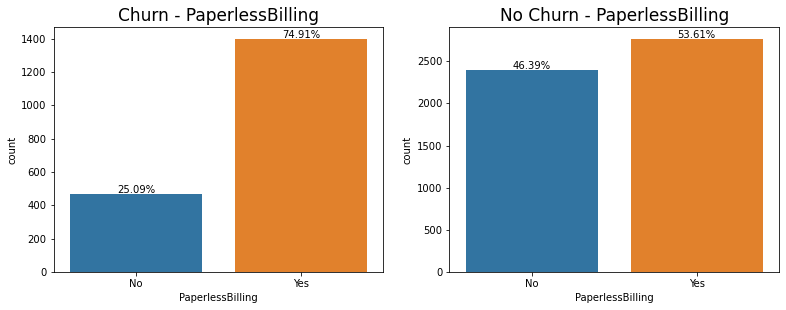

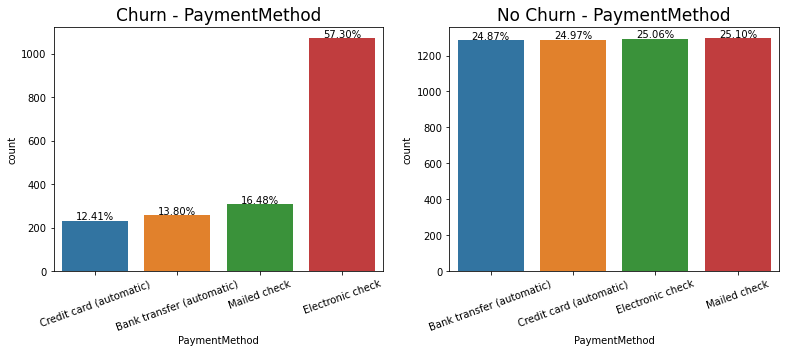

In [66]:
#Plot counts of churned and didnt churn
total_churn_vals = data['Churn'].value_counts().sort_values()

plt.figure(figsize=(13,4.5))
plt.title('Total Customer Churn', fontsize=17)
plt.text(0,total_churn_vals[0]+80, "{:0.2f}%".format(total_churn_vals[0]/total_churn_vals.sum()*100), 
         horizontalalignment='center', verticalalignment='center', color='black')
plt.text(1,total_churn_vals[1]+80 , "{:0.2f}%".format(total_churn_vals[1]/total_churn_vals.sum()*100), 
         horizontalalignment='center', verticalalignment='center', color='black')
# plt.axis('off')
sns.countplot(data=data, x='Churn')

#Plot all catagorical variables distribution
for colName in cat_cols:
    drawBar(churn, no_churn, colName)